# Inleiding

Hedendaags de dag heeft iedereen wel eens last gehad van malware,
maar hoe komt deze malware nu eigenlijk op een desbetreffende pc.
In meest van deze gevallen komt dit door een “drive by download” attack.
Wanneer een slachtoffer een betreffende site bezoek wordt op de achtergrond een installatie uitgevoerd zonder dat de gebruiker hier zich van bewust is.
Tijdens dit onderzoek ga ik kijken of er een correlatie te vinden is tussen malware en een gibberish URL en of hierbij de hoeveelheid code die wordt ingeladen van invloed kan zijn.
Uit dit onderzoek hoop ik een correlatie te vinden tussen deze domeinen.
Ook wordt in dit onderzoek aangekaart welke Supervised machine learning algoritmes zijn toegepast om tot een gewenst resultaat te komen.
Hierbij wordt uitgelegd waarom een bepaald algoritme een voorkeur kan hebben op een bepaalde analyse.
Tijdens dit onderzoek maak ik gebruik van de dataset SINGH, AMIT KUMAR (2020), “Dataset of Malicious and Benign Webpages” ;
De dataset bevat geëxtraheerde attributen van websites die kunnen worden gebruikt voor het classificeren van webpagina’s als kwaadaardig of goedaardig.
De dataset bevat ook ruwe pagina-inhoud,
waaronder JavaScript-code, die kan worden gebruikt als ongestructureerde gegevens in machine learning of voor het extraheren van verdere attributen(SINGH, 2020).
Dit onderzoek heeft als doeleinde gebruikers te waarschuwen voor links die een bepaalde structuur hanteren.
De onderzoekvraag luid dan ook als volgt: ”Is er een correlatie tussen “drive by download malware” en gibberish URL’s en/of de hoeveelheid code die de desbetreffende webpagina inlaad”.
Tijdens dit (correlationeel) onderzoek ga ik kijken of ik een correlatie kan aantonen tussen ”drive by download”malware, ”gibberish”URL-webadres en de hoeveelheid code ook wel code-volume genoemd

# Context
Op de dag van vandaag neemt de kans steeds groter toe dat men wel eens met malware te maken heeft gehad en in het bijzonder het ”drive by download” type.
Een drive by download maakt gebruik van kwetsbaar heden in de browser die wordt gebruikt door een slachtoffer.
”Drive by download” website worden maar voor een doel online gezet het infecteren van zoveel mogelijk computers die hun web URL bezoeken.
Er zijn drie mogelijkheden om met dit type malware in aanraking te komen.
Manier een het wel kennende fenomeen fishing waarbij een slachtoffer een mail krijg waarbij hij vervolgens wordt aangespoort om op een redirectknop te klikken waarna het slachtoffer vervolgens wordt doorgeleid naar de kwaadaardige website en wordt geïnfecteerd.
Mogelijkheid twee is dat de gebruiker via nep reclame wordt misleid om een desbetreffende site te bezoeken meestal zijn deze sites overgenomen of gehackt en worden deze reclame site zonder dat de eigenaar het weet misbruikt voor kwaadaardige doeleinden.
Meestal zien al deze sites er onschuldig uit.
Manier drie misschien ontvang een desbetreffend persoon een link in een e-mail, een sms of een bericht op sociale media waarin staat dat hij of zij iets interessants op een site moet bekijken.
Wanneer men de pagina opent, terwijl men geniet van het artikel of de cartoon, installeert de download zich op de computer (McAfee, 2012).
Is er een correlatie tussen een malware infectie en een kwaadaardige site code-volume.
Hierbij bedoelen we hoe veel code laat de website in.
We weten wat een ”drive by download ̈ ıs bij definitie.
Hierbij kunnen we concluderen dat een dit malware type voor veel onbewuste schade kan zorgen.
In dit onderzoek wordt niet uitgelegd hoe een ”Drive by download” te werk gaat op de achtergrond en het mechanisme van dit malware type.
De globale hypothese luid als volgt: met dit onderzoek hopen we een correlatie te vinden tussen de gedefinieerde labels.

#### Gibbarish URL maakt de kans op malware aanzienlijk
H0 - Er is geen correlatie tussen een specifiek URL opbouw en een kwaadaardig label.

$$𝐻_0:{gibbarish url} \neq kwaadaardig$$

H1 - er is een correlatie tussen een specifieke URL opbouwe en een kwaadaardig label.

$$𝐻_1:{gibbarish url} = kwaadaardig$$


#### Javascript volume maakt de kans op malware aanzienlijk
H0 - Er is geen correlatie tussen javascript volume en een kwaadaardige label.

$$𝐻_0:{javascript volume} \neq kwaadaardig$$

H1 - Er is een correlatie tussen javascript volume en een kwaadaardige label.

$$𝐻_1:{javascript volume} = kwaadaardig$$


# Hypothese testen
Om de hypothese te testen die hierboven zijn omschreven gaan we een onze dataset prepareren voor analyse.
Dit doen we door de dataset in te lezen en de benodigde labels uit de dataset te halen
Vervolgens splitsen we de data op in twee groepen.
Een groep met kwaadaardige web links en een groep met goedaardige web links.

In [21]:
# Import libraries
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Distribution dataset label (good, bad)
Total label bad: 2.23%
Total label good: 97.77%


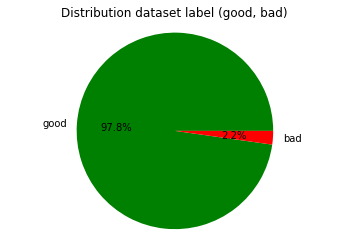

In [22]:
# Sample size
data_volume = 10
get_sample_volume = False

# Read dataset and get given columns
df = pd.read_csv("./dataset/Webpages_Classification_test_data.csv", sep=',',
                 usecols=['url', 'https', 'js_len', 'js_obf_len', 'label'])
# Sort data
df = df.sort_values(
    by="label",
    ascending=False
)
df.head()
# Exclude invalid data rows with null values
df_total = df[df['js_len'] != 0.0]

# Divide in two subgroups by label
df_bad = df_total[df_total['label'] == 'bad']
df_good = df_total[df_total['label'] == 'good']

# Get sample of with data_volume given above
if get_sample_volume:
    df_bad = df_bad.sample(n=data_volume)
    df_good = df_good.sample(n=data_volume)

# region label bad and js_len
total_label_bad = len(df_bad) / len(df_total) * 100
total_label_good = len(df_good) / len(df_total) * 100
distribution_percentage_label = total_label_good, total_label_bad

# region  Distribution
print("Distribution dataset label (good, bad)")
print("Total label bad: " + str(round(total_label_bad, 2)) + "%")
print("Total label good: " + str(round(total_label_good, 2)) + "%")

labels = 'good', 'bad'
colors = ['green', 'red']
plt.pie(distribution_percentage_label, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution dataset label (good, bad)')
plt.axis('equal')
plt.show()


## Boxplots

Boxplot Bad data:
Mean: 584.9314809994794
Median: 584.1


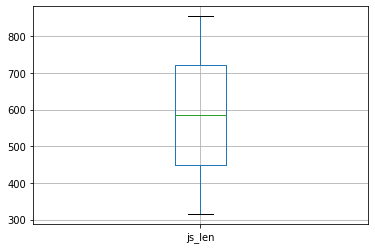

In [23]:
print("Boxplot Bad data:")
df_bad_js_len = df_bad['js_len']
mean_ban_js_len = statistics.fmean(df_bad_js_len)
median_ban_js_len = statistics.median(df_bad_js_len)
print("Mean:", mean_ban_js_len)
print("Median:", median_ban_js_len)

df_bad.boxplot(column=['js_len'])
plt.show()

Boxplot Good data:
Mean: 114.66742624594305
Median: 114.5


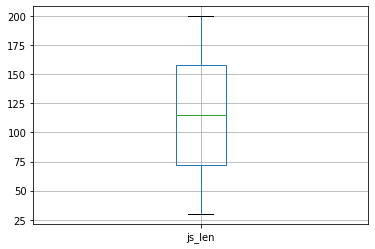

In [24]:
print("Boxplot Good data:")
df_good_js_len = df_good['js_len']
mean_good_js_len = statistics.fmean(df_good_js_len)
median_good_js_len = statistics.median(df_good_js_len)
print("Mean:", mean_good_js_len)
print("Median:", median_good_js_len)

df_good.boxplot(column=['js_len'])
plt.show()

### Sample mean from both

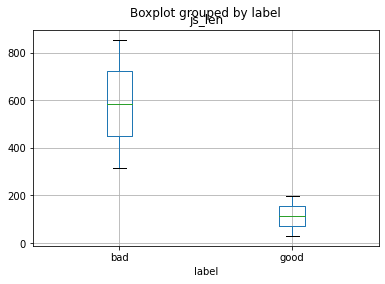

In [29]:
df_total.boxplot(column='js_len', by='label')
plt.show()

### Histogram KDE
Histogram KDE below

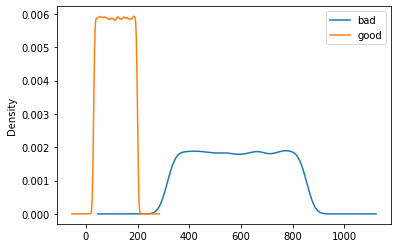

In [32]:
df_total.groupby('label')['js_len'].plot(kind='kde', legend=True)
plt.show()

### Scatter Plot
Scatter plot below

Text(0, 0.5, 'js_len')

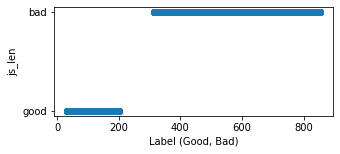

In [33]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.scatter(x=df_total['js_len'], y=df_total['label'])
plt.xlabel("Label (Good, Bad)")
plt.ylabel("js_len")


## How many are pornographic

In [ ]:
# Filter words to identify pornographic urls
bad_words = ['adult', 'porn', 'ass', 'tits', 'xxx', 'dildo', 'naked', 'sex', 'slave', 'naughty', 'fetish',
                 'hardcore', 'escort', 'sluts', 'pussy', 'porno', 'eroti']
df_bad_filtered = df_bad[~df_bad.url.str.contains('|'.join(bad_words)).groupby(level=0).any()]
total_label_bad_porn = 100 - (len(df_bad_filtered) / len(df_bad) * 100)
total_label_bad = len(df_bad_filtered) / len(df_bad) * 100
distribution_percentage_label = total_label_bad_porn, total_label_bad

# region  Distribution
print("Distribution dataset label (bad, pornographic & bad)")
print("Total label bad but normal: ", str(round(total_label_bad, 2)))
print("Total label pornographic & bad: ", str(round(total_label_bad_porn, 2)))

labels = 'normal url & bad', 'pornographic url & bad'
colors = ['red', 'orange']
plt.pie(distribution_percentage_label, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution dataset label (bad, bad & pornographic) url')
plt.axis('equal')
plt.show()

Distribution dataset label (bad, pornographic & bad)
Total label bad but normal:  62.88
Total label pornographic & bad:  37.12


C:\Users\rikpe\AppData\Local\Temp/ipykernel_26552/3963605112.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bad_filtered = df_bad[~df_bad.url.str.contains('|'.join(bad_words)).groupby(level=0).any()]


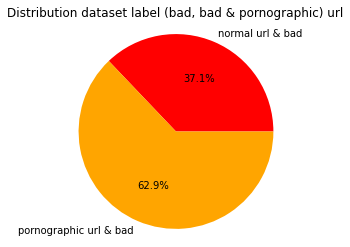

In [19]:
# Filter words to identify pornographic urls
bad_words = ['adult', 'porn', 'ass', 'tits', 'xxx', 'dildo', 'naked', 'sex', 'slave', 'naughty', 'fetish',
                 'hardcore', 'escort', 'sluts', 'pussy', 'porno', 'eroti']
df_bad_filtered = df_bad[~df_bad.url.str.contains('|'.join(bad_words)).groupby(level=0).any()]
total_label_bad_porn = 100 - (len(df_bad_filtered) / len(df_bad) * 100)
total_label_bad = len(df_bad_filtered) / len(df_bad) * 100
distribution_percentage_label = total_label_bad_porn, total_label_bad

# region  Distribution
print("Distribution dataset label (bad, pornographic & bad)")
print("Total label bad but normal: ", str(round(total_label_bad, 2)))
print("Total label pornographic & bad: ", str(round(total_label_bad_porn, 2)))

labels = 'normal url & bad', 'pornographic url & bad'
colors = ['red', 'orange']
plt.pie(distribution_percentage_label, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution dataset label (bad, bad & pornographic) url')
plt.axis('equal')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.scatter(x=df_total['js_len'], y=df_total['label'])
plt.xlabel("Label (Good, Bad)")
plt.ylabel("js_len")